# AIM: To predict seasonal vaccination

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#importing features

features_df = pd.read_csv('vacc_pred_features.csv',index_col= 0)
features_df.head()



,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
print(features_df.shape)

(26707, 35)


In [6]:
#importing labels

labels_df = pd.read_csv('vacc_pred_targets.csv',index_col=0)
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [7]:
print(labels_df.shape) #to check the number of rows and columns in features

(26707, 2)


In [8]:
## X = 0 (row) y=o i.e axis =1 or y =1 then it adds only columns and not the rows 
data = pd.concat([features_df,labels_df],axis=1)
data

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


In [9]:
data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [11]:
data.shape

(26707, 37)

In [12]:
data.describe() #to check min/max vales and std.deviations

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [13]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [14]:
labels_df.describe()

,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000
mean,0.212454,0.465608
std,0.409052,0.498825
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [15]:
data.isnull().sum()  #to check the null values

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [16]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [17]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


In [18]:
## From this we can conclude that the data is highly imbalanced  
## We will see this in data preprocessing 
labels_df.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [19]:
labels_df.seasonal_vaccine.value_counts()  #here data is slightly imbalanced

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [20]:
data.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [21]:
## Checking null values percentage in the data 
nan_features_df = round(features_df.isna().sum()/features_df.shape[0] * 100,2) ## 2 shows upto two decimal points 
nan_features_df

h1n1_concern                    0.34
h1n1_knowledge                  0.43
behavioral_antiviral_meds       0.27
behavioral_avoidance            0.78
behavioral_face_mask            0.07
behavioral_wash_hands           0.16
behavioral_large_gatherings     0.33
behavioral_outside_home         0.31
behavioral_touch_face           0.48
doctor_recc_h1n1                8.09
doctor_recc_seasonal            8.09
chronic_med_condition           3.64
child_under_6_months            3.07
health_worker                   3.01
health_insurance               45.96
opinion_h1n1_vacc_effective     1.46
opinion_h1n1_risk               1.45
opinion_h1n1_sick_from_vacc     1.48
opinion_seas_vacc_effective     1.73
opinion_seas_risk               1.92
opinion_seas_sick_from_vacc     2.01
age_group                       0.00
education                       5.27
race                            0.00
sex                             0.00
income_poverty                 16.56
marital_status                  5.27
r

In [22]:

features_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

# EDA

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

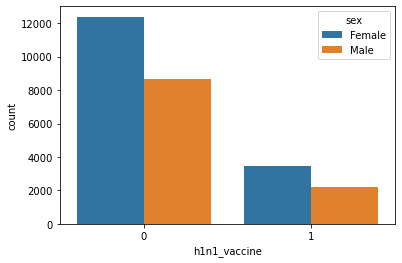

In [23]:
## Lets see how many people have taken the vaccine 


sns.countplot(x='h1n1_vaccine',hue='sex',data=data)


<AxesSubplot:xlabel='seasonal_vaccine', ylabel='count'>

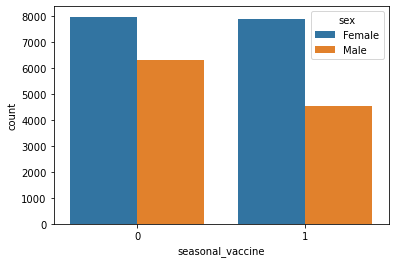

In [24]:
sns.countplot(x='seasonal_vaccine',hue='sex',data=data)

In [25]:
## From the above figure we can conclude that more no. of people have taken seasonal vaccine irrespective of sex.

In [26]:
## Data Analysis
obj_data = features_df.select_dtypes(include="object")
obj_data

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN


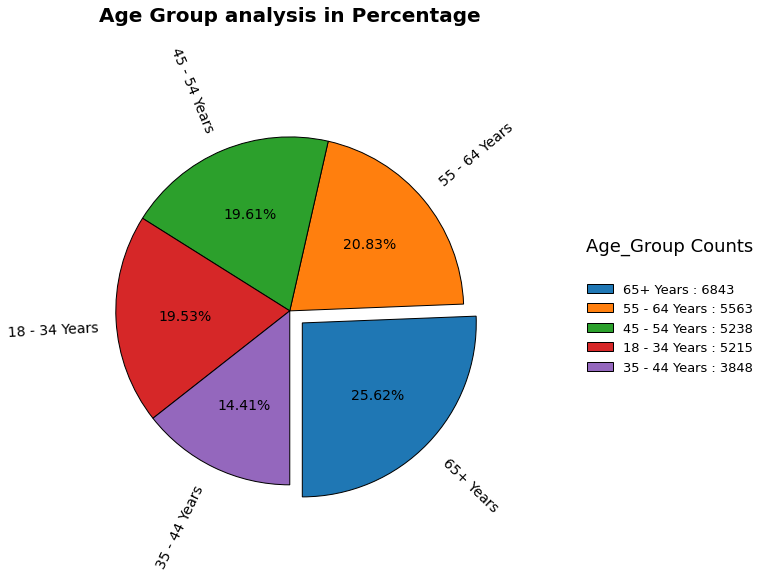

In [27]:
percent=[]
for i in obj_data['age_group'].value_counts():
    percent.append(i)
    
wedgeprops = {"linewidth": 1, 'width':1, "edgecolor":"k"}
textprops = {"fontsize":14}
explode = [0.1,0,0,0,0]
plt.figure(figsize = (8,8))
plt.pie(percent,labels = ['65+ Years', '55 - 64 Years', '45 - 54 Years', '18 - 34 Years',
       '35 - 44 Years'],
        explode=explode, autopct = "%0.2f%%", startangle = 270,
        wedgeprops = wedgeprops,textprops = textprops,rotatelabels=True) 
plt.title("Age Group analysis in Percentage\n\n\n",fontsize=20,fontweight='bold')
legend=plt.legend(bbox_to_anchor=(1.05, 0.8), 
           loc=0, 
           borderaxespad=4, 
           labels=["65+ Years : 6843","55 - 64 Years : 5563","45 - 54 Years : 5238","18 - 34 Years : 5215",
                   "35 - 44 Years : 3848"],
            fontsize=13)
legend.set_title("Age_Group Counts\n",prop={"size":18})
legend.draw_frame(False)
plt.show()

In [28]:
### In given datatset, 65+ year person are more in number and after that 55-64 year person group in number.
##35-44 year age group people are least in number inn given dataset.
##The dataset consist old age people more in number compare to young age people

In [29]:
## Age Analysis with gender

print("\033[1m\nCount of age group with Gender :")
pd.crosstab(data['age_group'], data['sex'], margins=True)


Count of age group with Gender :


sex,Female,Male,All
age_group,,,
18 - 34 Years,2808,2407,5215
35 - 44 Years,2247,1601,3848
45 - 54 Years,3148,2090,5238
55 - 64 Years,3268,2295,5563
65+ Years,4387,2456,6843
All,15858,10849,26707


In [30]:
print("\033[1m\nPercentage Count of age group with Gender : ")
age_vs_sex = pd.crosstab(data['age_group'], data['sex'], margins=True,normalize=True)
round(age_vs_sex.multiply(100),2)


Percentage Count of age group with Gender : 


sex,Female,Male,All
age_group,,,
18 - 34 Years,10.51,9.01,19.53
35 - 44 Years,8.41,5.99,14.41
45 - 54 Years,11.79,7.83,19.61
55 - 64 Years,12.24,8.59,20.83
65+ Years,16.43,9.20,25.62
All,59.38,40.62,100.00


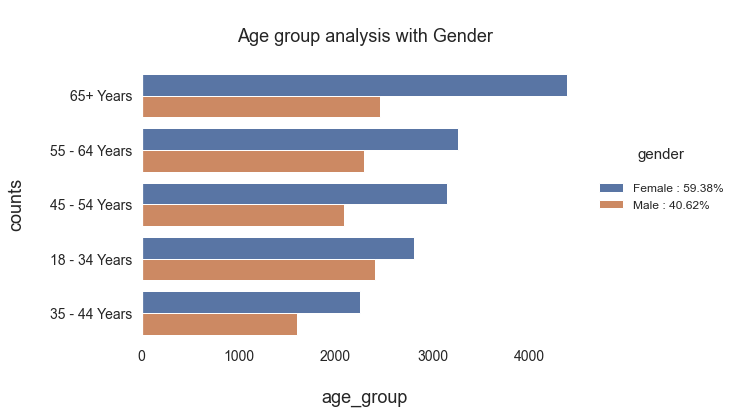

In [31]:
plt.figure(figsize=(8,5))
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":18,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'white'})
sns.countplot(y='age_group',order = data['age_group'].value_counts().index,hue='sex',data=data)
plt.title("\nAge group analysis with Gender\n")
plt.xlabel("\nage_group")
plt.ylabel("counts\n")
legend = plt.legend(bbox_to_anchor=(1, 0.75),
          labels=["Female : 59.38%","Male : 40.62%"],
          title = "gender\n")
legend.set_title("gender\n",prop={"size":15})
legend.draw_frame(False)
plt.show()

In [32]:
## From above figure, we observe that dataset consist of more number of female compare to male in every age group.
## The age group belongs from 18-34 years have near about equal number of male & feamle.
## More number of female & male are present in 65+ year age group.
## Less number of male & female are present in 35-44 Years age group

In [33]:
## Age Analysis with education 
print("\033[1m\nCount of age group with education :")
pd.crosstab(data['age_group'], data['education'], margins=True)


Count of age group with education :


education,12 Years,< 12 Years,College Graduate,Some College,All
age_group,,,,,
18 - 34 Years,1106,503,1699,1535,4843
35 - 44 Years,588,251,1773,934,3546
45 - 54 Years,1074,339,2121,1445,4979
55 - 64 Years,1154,387,2394,1440,5375
65+ Years,1875,883,2110,1689,6557
All,5797,2363,10097,7043,25300


In [34]:
print("\033[1m\nPercent count of age group with education :")
age_vs_edu =pd.crosstab(data['age_group'], data['education'], margins=True,normalize=True)
round(age_vs_edu.multiply(100),2)


Percent count of age group with education :


education,12 Years,< 12 Years,College Graduate,Some College,All
age_group,,,,,
18 - 34 Years,4.37,1.99,6.72,6.07,19.14
35 - 44 Years,2.32,0.99,7.01,3.69,14.02
45 - 54 Years,4.25,1.34,8.38,5.71,19.68
55 - 64 Years,4.56,1.53,9.46,5.69,21.25
65+ Years,7.41,3.49,8.34,6.68,25.92
All,22.91,9.34,39.91,27.84,100.00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


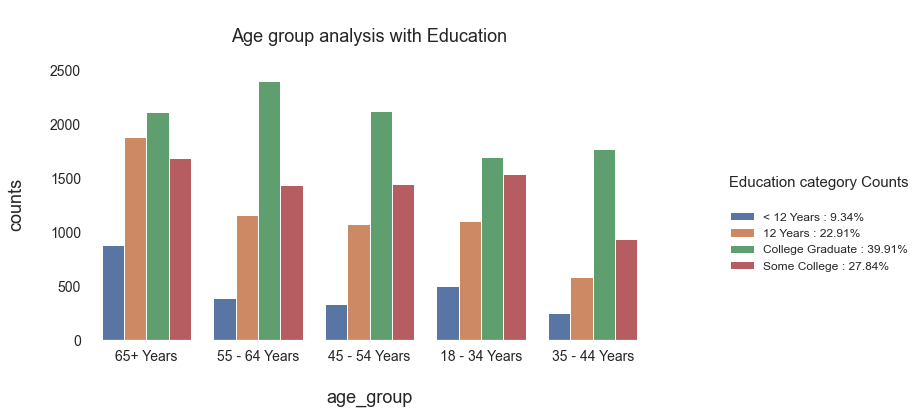

In [35]:
plt.figure(figsize=(10,5))
sns.countplot('age_group',order = data['age_group'].value_counts().index,hue='education',data=data)
plt.title("\nAge group analysis with Education\n")
plt.xlabel("\nage_group")
plt.ylabel("counts\n")
legend = plt.legend(bbox_to_anchor=(1.05, 0.8), 
           loc=0, 
           borderaxespad=4, 
           labels=["< 12 Years : 9.34%","12 Years : 22.91%","College Graduate : 39.91%","Some College : 27.84%"],
           )
legend.set_title("Education category Counts\n",prop={"size":15})
legend.draw_frame(False)
plt.show()

In [36]:
## Analysis between age group & Education:
## In every age group, College graduate are more in number while person takes education less than 12 year are least in number.
## The education category i.e Some College are second more number are present in dataset



In [37]:
print("\033[1m\nCount of age group with race :")
pd.crosstab(data['age_group'], data['race'], margins=True)


Count of age group with race :


race,Black,Hispanic,Other or Multiple,White,All
age_group,,,,,
18 - 34 Years,492,667,475,3581,5215
35 - 44 Years,337,379,286,2846,3848
45 - 54 Years,423,314,307,4194,5238
55 - 64 Years,416,217,268,4662,5563
65+ Years,450,178,276,5939,6843
All,2118,1755,1612,21222,26707


In [38]:
print("\033[1m\nPercent count of age group with race :")
age_vs_race = pd.crosstab(data['age_group'], data['race'], margins=True,normalize=True)
round(age_vs_race.multiply(100),2)


Percent count of age group with race :


race,Black,Hispanic,Other or Multiple,White,All
age_group,,,,,
18 - 34 Years,1.84,2.50,1.78,13.41,19.53
35 - 44 Years,1.26,1.42,1.07,10.66,14.41
45 - 54 Years,1.58,1.18,1.15,15.70,19.61
55 - 64 Years,1.56,0.81,1.00,17.46,20.83
65+ Years,1.68,0.67,1.03,22.24,25.62
All,7.93,6.57,6.04,79.46,100.00


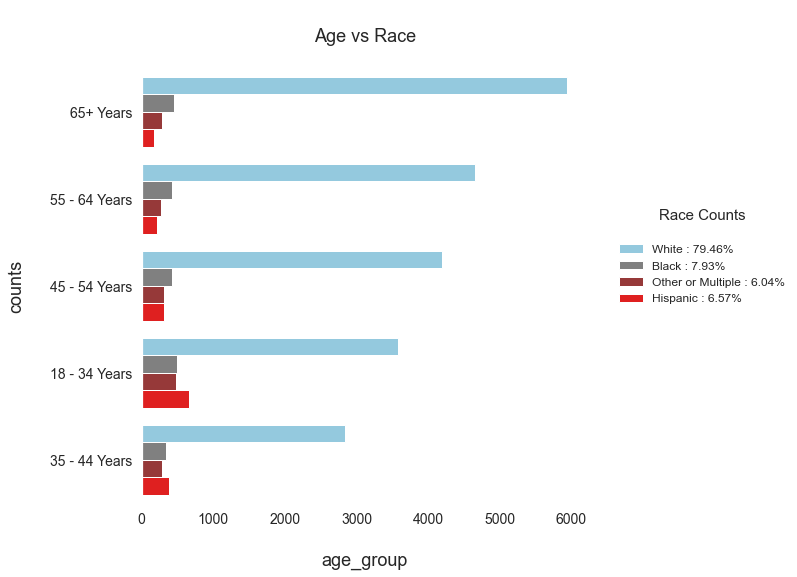

In [39]:
#sns.set(rc={'figure.facecolor':'orange'})
#plt.style.use('dark_background')
plt.figure(figsize=(8,8))
sns.countplot(y='age_group',order = data['age_group'].value_counts().index,hue='race',data=data,palette=["skyblue","grey","brown","red"])
plt.title("\nAge vs Race\n")
plt.xlabel("\nage_group")
plt.ylabel("counts\n")
legend = plt.legend(bbox_to_anchor=(0.95, 0.8), 
           loc=0, 
           borderaxespad=4, 
           labels=["White : 79.46%","Black : 7.93%","Other or Multiple : 6.04%","Hispanic : 6.57%"],
          title = "Race Counts\n")
legend.set_title("Race Counts\n",prop={"size":15})
legend.draw_frame(False)
plt.show()


In [40]:
## Age Analysis with Marital status 
print("\033[1m\nPercent count of age group with marital status :")
age_vs_marrage = pd.crosstab(data['marital_status'], data['age_group'],margins=True,normalize=True)
round(age_vs_marrage.multiply(100),2)


Percent count of age group with marital status :


age_group,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,All
marital_status,,,,,,
Married,7.52,9.13,12.08,12.82,12.02,53.58
Not Married,11.59,4.87,7.57,8.40,13.99,46.42
All,19.11,14.00,19.65,21.22,26.01,100.00


In [41]:
print("\033[1m\nCount of age group with marital status :")
pd.crosstab(data['marital_status'], data['age_group'],margins=True)


Count of age group with marital status :


age_group,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,All
marital_status,,,,,,
Married,1902,2311,3057,3243,3042,13555
Not Married,2933,1232,1914,2126,3539,11744
All,4835,3543,4971,5369,6581,25299


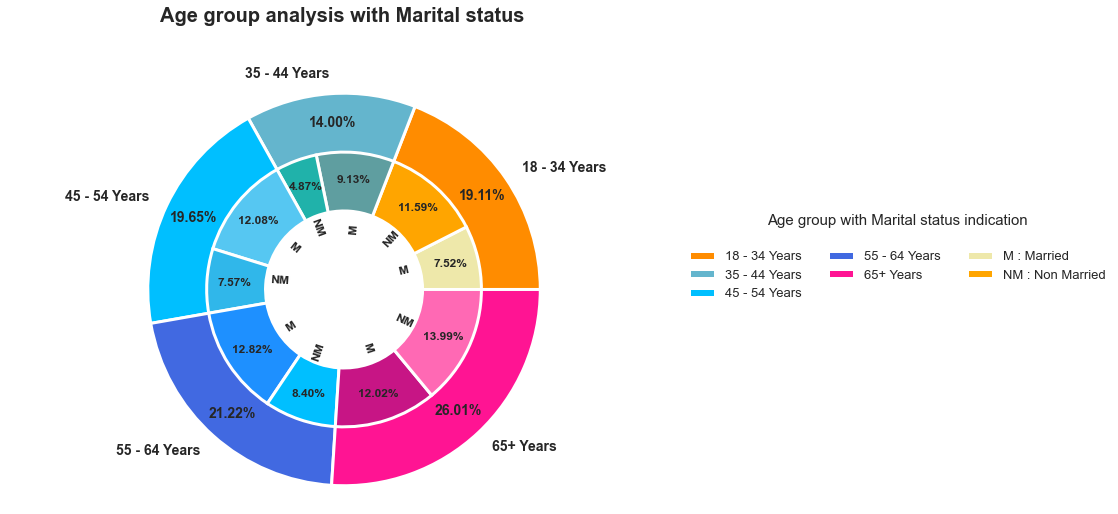

In [42]:
plt.figure(figsize=(12,8))
plt.title("Age group analysis with Marital status\n\n",fontsize=20,fontweight="bold")
plt.pie([4835,3543,4971,5369,6581], radius=1,
        colors=['darkorange', 'c','deepskyblue','royalblue',"deeppink"],
        labels=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'], 
        autopct='%.2f%%',
        pctdistance=0.85, textprops = {"fontsize":14,"fontweight":"bold"},
        wedgeprops=dict(width=0.6, edgecolor='white',linewidth=3))

plt.pie([1902,2933,2311,1232,3057,1914,3243,2126,3042,3539], radius=0.7,
        colors=['palegoldenrod','orange', 'cadetblue', 'lightseagreen',
                '#56C7F2','#30B7EA','dodgerblue', 'deepskyblue',"mediumvioletred","hotpink"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":12,"fontweight":"bold"},
         labels=['M','NM','M','NM','M','NM','M',
                 'NM','M','NM'],autopct='%.2f%%',
        pctdistance=0.8, labeldistance=0.4,rotatelabels=True )

legend = plt.legend(bbox_to_anchor=(1, 0.7),
          labels=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years',
                  "M : Married","NM : Non Married"],
          title = "Age group with Marital status indication\n",
          ncol=3,
          fontsize=13)
legend.set_title("Age group with Marital status indication\n",prop={"size":15})
legend.draw_frame(False)

plt.axis('equal')
plt.show()

In [43]:
##So, here we get some interest facts from the dataset:
##In 65+ Years age group ,14% are non married people while 12 % are m,arried people
##In 55-64% age group, 12.82 % are married people while 8.40% are non married people
##Total number of married people in dataset is 53.58%while non married people are 42.42%

In [44]:
## Age group analysis with income poverty
print("\033[1m\nPercent count of age group with income poverty :")
age_vs_income = pd.crosstab(data['age_group'], data['income_poverty'],margins=True,normalize=True)
round(age_vs_income.multiply(100),2)


Percent count of age group with income poverty :


income_poverty,"<= $75,000, Above Poverty","> $75,000",Below Poverty,All
age_group,,,,
18 - 34 Years,10.53,5.21,3.93,19.66
35 - 44 Years,6.72,6.39,1.69,14.80
45 - 54 Years,10.17,8.25,1.89,20.32
55 - 64 Years,12.45,7.27,1.79,21.50
65+ Years,17.46,3.44,2.81,23.71
All,57.34,30.56,12.10,100.00


In [45]:
print("\033[1m\nCount of age group with income poverty :")
pd.crosstab(data['age_group'], data['income_poverty'],margins=True)


Count of age group with income poverty :


income_poverty,"<= $75,000, Above Poverty","> $75,000",Below Poverty,All
age_group,,,,
18 - 34 Years,2347,1160,875,4382
35 - 44 Years,1498,1425,376,3299
45 - 54 Years,2267,1838,422,4527
55 - 64 Years,2774,1620,398,4792
65+ Years,3891,767,626,5284
All,12777,6810,2697,22284


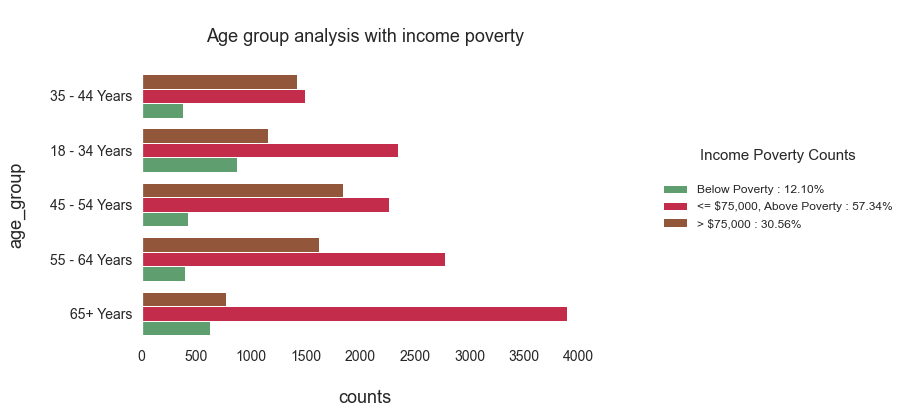

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(y='age_group',order = data['age_group'].value_counts().index,hue='income_poverty',data=data,palette=["g",'crimson','sienna'])
plt.title("\nAge group analysis with income poverty\n")
plt.xlabel("\ncounts")
plt.ylabel("age_group\n")
legend = plt.legend(bbox_to_anchor=(1.05, 0.9), 
           loc=0, 
           borderaxespad=4, 
          labels=["Below Poverty : 12.10%","<= $75,000, Above Poverty : 57.34%","> $75,000 : 30.56%"])
legend.set_title("Income Poverty Counts\n",prop={"size":15})
legend.draw_frame(False)
plt.gca().invert_yaxis()
plt.show()

In [47]:
## Age group analysis with housing situation of respondent
print("\033[1m\nPercent count of age group with housing situation of respondent :")
age_vs_house = pd.crosstab(data['age_group'], data['rent_or_own'],margins=True,normalize=True)
round(age_vs_house.multiply(100),2)


Percent count of age group with housing situation of respondent :


rent_or_own,Own,Rent,All
age_group,,,
18 - 34 Years,10.23,8.97,19.20
35 - 44 Years,10.47,3.59,14.06
45 - 54 Years,15.95,3.84,19.79
55 - 64 Years,17.93,3.31,21.24
65+ Years,21.38,4.33,25.72
All,75.96,24.04,100.00


In [48]:
print("\033[1m\nCount of age group with housing situation of respondent :")
pd.crosstab(data['age_group'], data['rent_or_own'],margins=True)


Count of age group with housing situation of respondent :


rent_or_own,Own,Rent,All
age_group,,,
18 - 34 Years,2524,2212,4736
35 - 44 Years,2582,885,3467
45 - 54 Years,3933,947,4880
55 - 64 Years,4423,816,5239
65+ Years,5274,1069,6343
All,18736,5929,24665


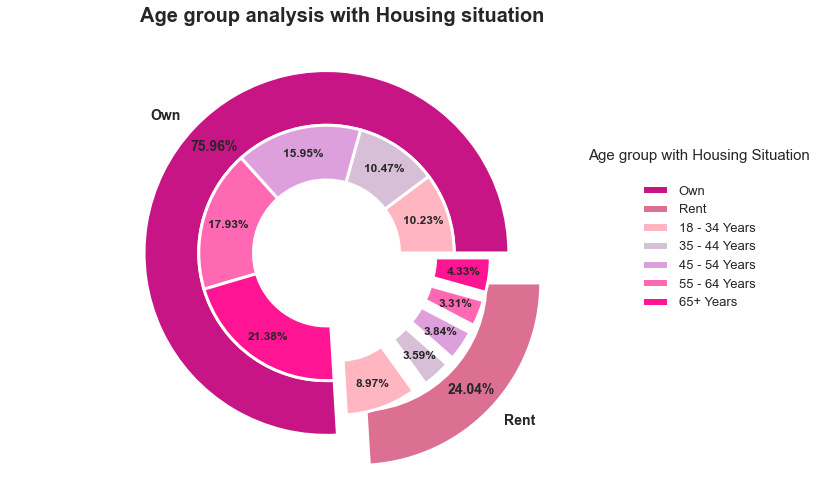

In [49]:
plt.figure(figsize=(12,8))
plt.title("Age group analysis with Housing situation\n",fontsize=20,fontweight="bold")


plt.pie([18736,5929], radius=1,
        colors=["mediumvioletred","palevioletred"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":14,"fontweight":"bold"},
         labels=["Own","Rent"],autopct='%.2f%%',explode = [0,0.24],
        pctdistance=0.85, labeldistance=1.1, )

plt.pie([2524,2582,3933,4423,5274,2212,885,947,816,1069], radius=0.7,
        colors=["lightpink","thistle","plum","hotpink","deeppink"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":12,"fontweight":"bold"},
         autopct='%.2f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,0.2],
        pctdistance=0.8, labeldistance=0.4, )

legend = plt.legend(bbox_to_anchor=(0.85, 0.8),
          labels=['Own','Rent','18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'],
          fontsize=13)
legend.set_title("Age group with Housing Situation\n",prop={"size":15})
legend.draw_frame(False)

plt.axis('equal')
plt.show()

In [50]:
## In given dataset, 75.96% are Own housing people while 24.014% are rent housing people.
## In Own housing people, 21.38% people are belongs from 65+ year age group which is high in number while 10.23% people are belongs from 18-34 years age group which is least in number
## In Rent housing people, 8.97% people are belongs from 18-34 years age group which is high in number while 3.31% people are belongs from 55-64 years age group which is least in number



# Data Pre-processing


In [51]:
## Creating separate variable for numerical and removing null values 
df_num = data.select_dtypes(exclude = 'object')
df_num

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0,1


In [52]:
print(df_num.shape)

(26707, 25)


In [53]:
features = ['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status','census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation','h1n1_vaccine', 'seasonal_vaccine']

In [54]:
list(enumerate(features))

[(0, 'h1n1_concern'),
 (1, 'h1n1_knowledge'),
 (2, 'behavioral_antiviral_meds'),
 (3, 'behavioral_avoidance'),
 (4, 'behavioral_face_mask'),
 (5, 'behavioral_wash_hands'),
 (6, 'behavioral_large_gatherings'),
 (7, 'behavioral_outside_home'),
 (8, 'behavioral_touch_face'),
 (9, 'doctor_recc_h1n1'),
 (10, 'doctor_recc_seasonal'),
 (11, 'chronic_med_condition'),
 (12, 'child_under_6_months'),
 (13, 'health_worker'),
 (14, 'health_insurance'),
 (15, 'opinion_h1n1_vacc_effective'),
 (16, 'opinion_h1n1_risk'),
 (17, 'opinion_h1n1_sick_from_vacc'),
 (18, 'opinion_seas_vacc_effective'),
 (19, 'opinion_seas_risk'),
 (20, 'opinion_seas_sick_from_vacc'),
 (21, 'age_group'),
 (22, 'education'),
 (23, 'race'),
 (24, 'sex'),
 (25, 'income_poverty'),
 (26, 'marital_status'),
 (27, 'rent_or_own'),
 (28, 'employment_status'),
 (29, 'census_msa'),
 (30, 'household_adults'),
 (31, 'household_children'),
 (32, 'employment_industry'),
 (33, 'employment_occupation'),
 (34, 'h1n1_vaccine'),
 (35, 'seasonal_v

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [56]:
## using simple imputer for replacing null values with median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='median')
df_num.iloc[:,:] = imputer.fit_transform(df_num)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [57]:
df_num.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
h1n1_vaccine                   0
seasonal_vaccine               0
dtype: int64

In [58]:
df_obj = data.select_dtypes(include="object")
df_obj

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN


In [59]:
## using simple imputer replacing categorical nan values 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_obj.iloc[:,:] = imputer.fit_transform(df_obj)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-59-2f678b6104f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj.iloc[:,:] = imputer.fit_transform(df_obj)


In [60]:
df_obj.isnull().sum()


age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

In [61]:
## label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_obj = df_obj.apply(label.fit_transform)

In [62]:
## joining both numerical and categorical data for further processing 
data1 = pd.concat([df_obj,df_num],axis = 1)
data1.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,3,0,2,1,0,1,8,2,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,1,0,3,1,2,1,1,0,1,0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0.0,1.0
2,0,2,3,1,0,1,0,0,9,0,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0
3,4,0,3,0,2,1,1,1,5,1,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0.0,1.0
4,2,3,3,0,0,0,0,0,9,0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0


In [63]:
## Dropping the columns which are irrelavant
data1.drop(['employment_industry','employment_occupation','health_insurance'], axis = 1,inplace = True)

In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_group                    26707 non-null  int32  
 1   education                    26707 non-null  int32  
 2   race                         26707 non-null  int32  
 3   sex                          26707 non-null  int32  
 4   income_poverty               26707 non-null  int32  
 5   marital_status               26707 non-null  int32  
 6   rent_or_own                  26707 non-null  int32  
 7   employment_status            26707 non-null  int32  
 8   hhs_geo_region               26707 non-null  int32  
 9   census_msa                   26707 non-null  int32  
 10  h1n1_concern                 26707 non-null  float64
 11  h1n1_knowledge               26707 non-null  float64
 12  behavioral_antiviral_meds    26707 non-null  float64
 13  behavioral_avoid

In [65]:
## Checking the data type 
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_group                    26707 non-null  int32  
 1   education                    26707 non-null  int32  
 2   race                         26707 non-null  int32  
 3   sex                          26707 non-null  int32  
 4   income_poverty               26707 non-null  int32  
 5   marital_status               26707 non-null  int32  
 6   rent_or_own                  26707 non-null  int32  
 7   employment_status            26707 non-null  int32  
 8   hhs_geo_region               26707 non-null  int32  
 9   census_msa                   26707 non-null  int32  
 10  h1n1_concern                 26707 non-null  float64
 11  h1n1_knowledge               26707 non-null  float64
 12  behavioral_antiviral_meds    26707 non-null  float64
 13  behavioral_avoid

# Feature-Selection


In [66]:
 ## It is used to pick certain features that have the best relationship to the performance variable.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [67]:
x_seas = data1.iloc[:,:-2] ## Independent variables
y_seas= data1.iloc[:,-1]  ## Target variable 


In [68]:
## Apply select K best to extract best features 
bestfeatures = SelectKBest(chi2,k=15)
fit = bestfeatures.fit(x_seas,y_seas)

In [69]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_seas.columns)

In [70]:
## Concatenating two dataframes for better visualisations 
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

In [71]:
featurescores

,feature_names,Scores
0,age_group,1997.217625
1,education,5.762772
2,race,91.674338
3,sex,94.243768
4,income_poverty,38.808131
5,marital_status,26.849772
6,rent_or_own,215.311327
7,employment_status,67.380193
8,hhs_geo_region,14.872176
9,census_msa,7.253763


In [72]:

## printing top features 
print(featurescores.nlargest(15,'Scores'))

                  feature_names       Scores
28            opinion_seas_risk  2794.888237
20         doctor_recc_seasonal  2421.579654
0                     age_group  1997.217625
27  opinion_seas_vacc_effective   991.273021
25            opinion_h1n1_risk   866.169464
19             doctor_recc_h1n1   839.733852
21        chronic_med_condition   557.625394
31           household_children   538.442999
23                health_worker   383.862558
10                 h1n1_concern   325.148276
24  opinion_h1n1_vacc_effective   286.280388
6                   rent_or_own   215.311327
18        behavioral_touch_face   123.369866
11               h1n1_knowledge   115.652237
3                           sex    94.243768


In [73]:


x=data.loc[:,['opinion_seas_risk','doctor_recc_seasonal','age_group','opinion_seas_vacc_effective','opinion_h1n1_risk','doctor_recc_h1n1','chronic_med_condition',
              'household_children','health_worker','h1n1_concern','opinion_h1n1_vacc_effective','rent_or_own','behavioral_touch_face','h1n1_knowledge','sex']]

# Outliers

In [74]:
##sns.boxplot(x=data. health_worker)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


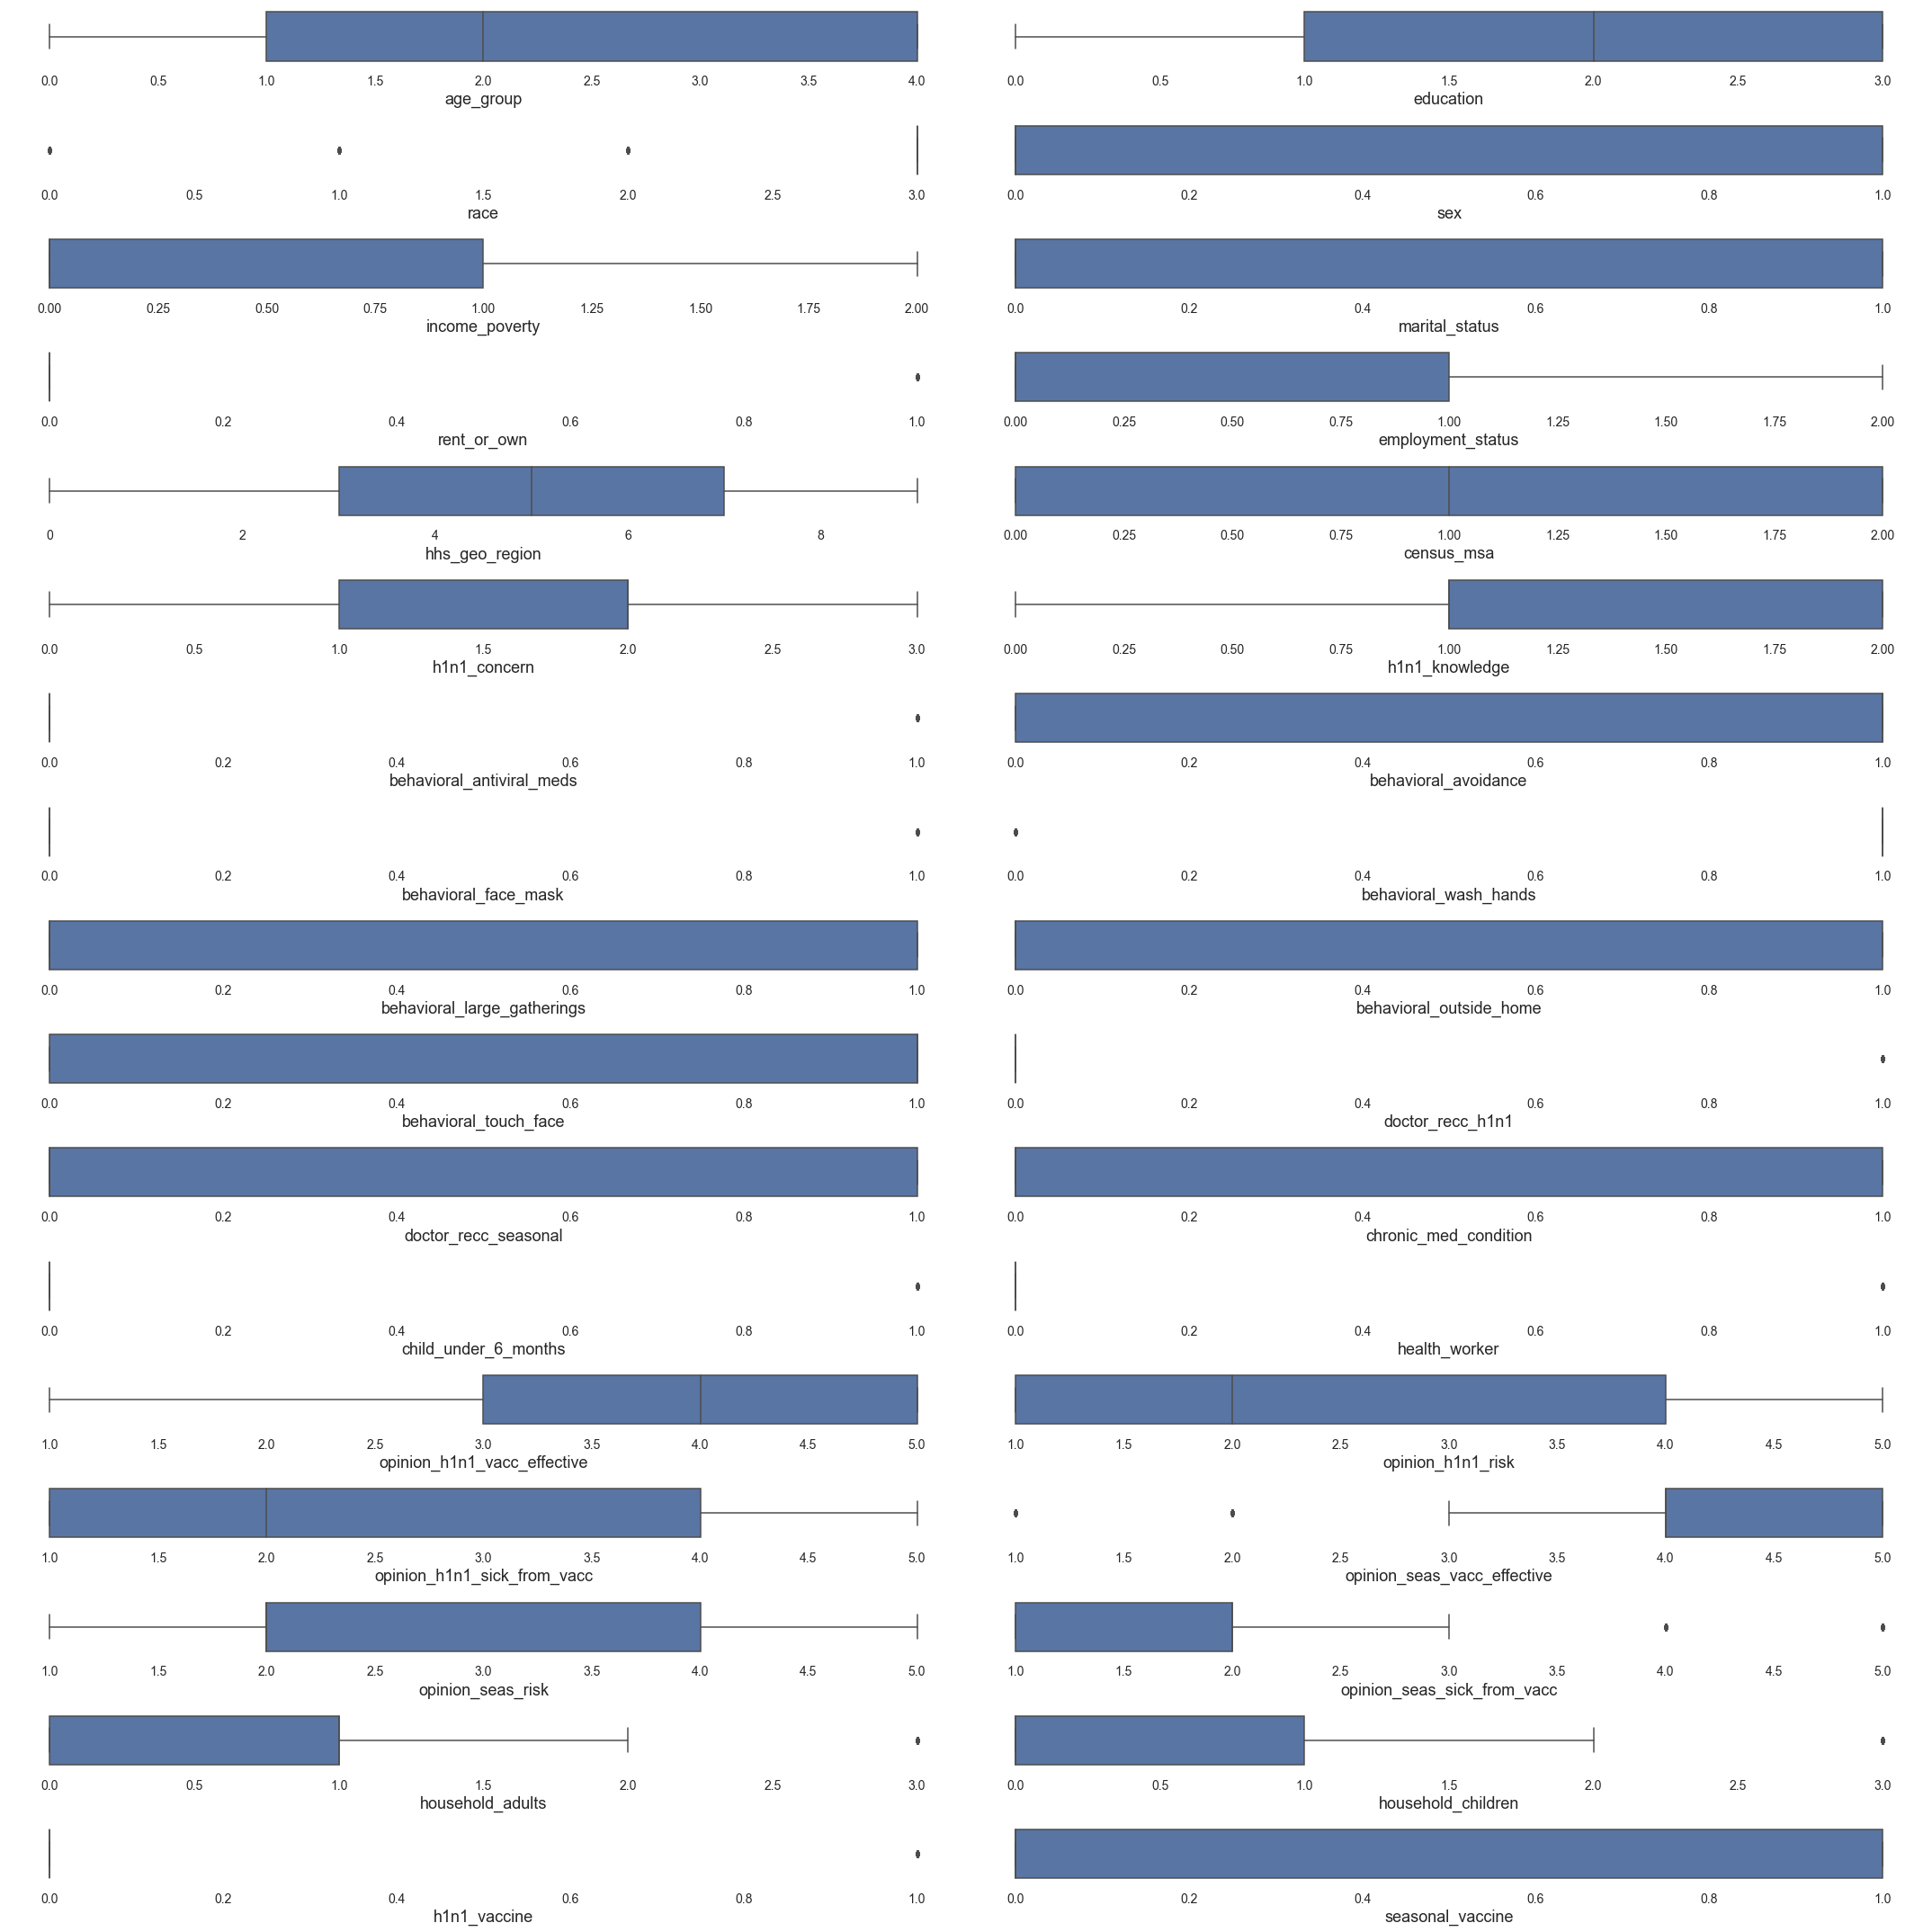

In [75]:
plt.figure(figsize=(30,30))
for index,cols in enumerate(data1):
    plt.subplot(17,2,index+1)
    sns.boxplot(data1.loc[:,cols])
plt.tight_layout()

In [76]:
data1.isnull().sum()

age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_

In [77]:
## Splitting the data 

X=data1.iloc[:,:-2]
y=data1.iloc[:,-1]

In [78]:
X.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,...,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,3,0,2,1,0,1,8,2,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,0,3,1,2,1,1,0,1,0,...,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,0,2,3,1,0,1,0,0,9,0,...,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,4,0,3,0,2,1,1,1,5,1,...,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2,3,3,0,0,0,0,0,9,0,...,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


In [79]:
y.head()

respondent_id
0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: seasonal_vaccine, dtype: float64

In [80]:
#balancing the data

from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
x_train_res,y_train_res = os.fit_resample(X,y)
x_train_res.shape,y_train_res.shape

((28544, 32), (28544,))

In [81]:
#counter to count before and after balancing

from collections import Counter
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(y_train_res)))

original dataset shape Counter({0.0: 14272, 1.0: 12435})
Resampled dataset shapeCounter({0.0: 14272, 1.0: 14272})


In [82]:
## Creating training and testing data 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train_res,y_train_res,test_size=0.25,random_state=45)

# For seasonal :accurate model is RandomForest classifier


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()  ## model creation 
rf.fit(x_train,y_train)
y_hat=rf.predict(x_test)

In [90]:
## evaluating model created 
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score, roc_curve
accuracy_score(y_test,y_hat)

0.7989069506726457

In [85]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      3598
         1.0       0.79      0.81      0.80      3538

    accuracy                           0.80      7136
   macro avg       0.80      0.80      0.80      7136
weighted avg       0.80      0.80      0.80      7136



In [86]:
print("Train Accuracy:",rf.score(x_train, y_train))
print("Test Accuracy:",rf.score(x_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.7989069506726457


In [89]:
roc_auc_score(y_test,y_hat)

0.7990235294967902

Text(0.5, 1.0, 'seasonal_vaccine ROC_curve:AUC=0.8725\n')

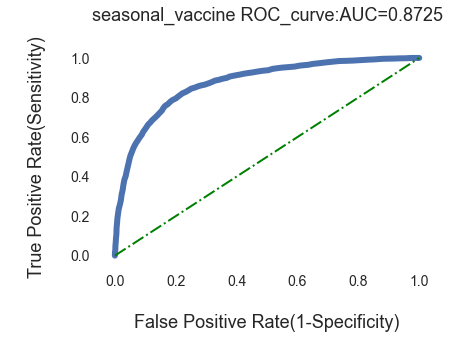

In [91]:
from sklearn.metrics import roc_curve,roc_auc_score
y_hat= rf.predict_proba(x_test)[:,1]
ftr,tpr, thresholds = roc_curve(y_test,y_hat)
plt.plot(ftr, tpr, lw=6)
plt.plot([0,1],[0,1],color='green',linestyle='dashdot',lw=2)
plt.xlabel('\nFalse Positive Rate(1-Specificity)')
plt.ylabel('\nTrue Positive Rate(Sensitivity)\n')
plt.title(f"seasonal_vaccine ROC_curve:AUC={roc_auc_score(y_test,y_hat):.4f}\n")

# The AUC score is high and from the graph, the performance of the model at distinguishing between the positive and negative classes are also high

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
Ex=ExtraTreesClassifier()  ## model creation 
Ex.fit(x_train,y_train)
y_hat_Ex=Ex.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_hat_Ex)

0.7951233183856502

In [94]:
print(classification_report(y_test,y_hat_Ex))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      3598
         1.0       0.79      0.80      0.79      3538

    accuracy                           0.80      7136
   macro avg       0.80      0.80      0.80      7136
weighted avg       0.80      0.80      0.80      7136



In [95]:
print("Train Accuracy:",Ex.score(x_train, y_train))
print("Test Accuracy:", Ex.score(x_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.7951233183856502


Text(0.5, 1.0, 'seasonal_vaccine ROC_curve:AUC=0.8740\n')

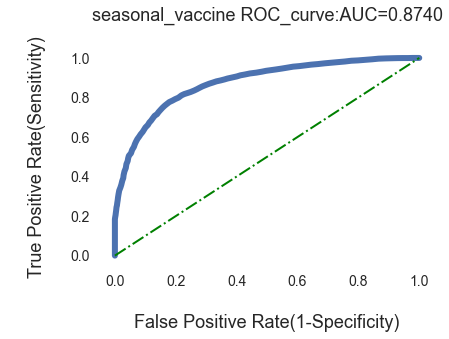

In [96]:
from sklearn.metrics import roc_curve,roc_auc_score
y_hat_Ex= Ex.predict_proba(x_test)[:,1]
ftr,tpr, thresholds = roc_curve(y_test,y_hat_Ex)
plt.plot(ftr, tpr, lw=6)
plt.plot([0,1],[0,1],color='green',linestyle='dashdot',lw=2)
plt.xlabel('\nFalse Positive Rate(1-Specificity)')
plt.ylabel('\nTrue Positive Rate(Sensitivity)\n')
plt.title(f"seasonal_vaccine ROC_curve:AUC={roc_auc_score(y_test,y_hat_Ex):.4f}\n")